In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import os.path
import cv2
print(tf.__version__)

2.0.0


In [2]:
#Test and train image set
train='D:\PokemonImages\PokemonData\Train'
test='D:\PokemonImages\PokemonData\Test'


In [3]:
#Printing the name of the pokemon images files that are in the training set
pokemon_name = os.listdir('D:\PokemonImages\PokemonData\Train')
print (pokemon_name)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

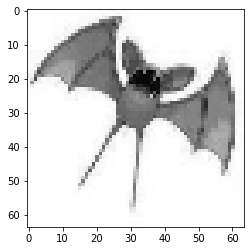

In [4]:
#processing the images files
imagep=[] # list for the images that are processed
labels=[]# labels so that images from different directories can be distinsguished
height = 64
width = 64
dim = (width, height) # setting the desired height and weight for the images
image_path = "D:\PokemonImages\PokemonData\Train" # path of the images 

#labeling and processing each image file for all the pokemon in our training directory into a numpy array
for pokemon in pokemon_name:
    image_files = os.path.join(image_path,pokemon) #getting images from each pokemon's directory
    pokeid_num = pokemon_name.index(pokemon)
    label = np.zeros(len(pokemon_name))
    label[pokeid_num] = 1
    labels.append(label)
    for img in (os.listdir(image_files)):
        try:
            img_read=cv2.cv2.imread(os.path.join(image_files,img),cv2.IMREAD_GRAYSCALE) #converting images to an array
            resize_img= cv2.resize(img_read, dim) # resizing the images according to the dimensions
            col_img=cv2.cvtColor(resize_img, cv2.IMREAD_GRAYSCALE)
            plt.imshow(col_img, cmap='gray') 
            imagep.append(([col_img,pokeid_num]))
        except Exception :
               pass

In [5]:
print (len(imagep))

6675


In [6]:
#Randomise the images to reduce chances of overfitting
import random

random.shuffle(imagep)


In [7]:
#making each indiviual image and label into an array and storing it into the list
X =[]
y =[]

for f,l in imagep:
    X.append(f)
    y.append(l)

X = np.array(X)#.reshape(-1,64,64, 1)
y=np.array(y)
y1=tf.keras.utils.to_categorical(y) # convert y values to a binary matrix for categorical_crossentropy

#checking that the x and y are the same shape
print ((X.shape))
print ((y.shape))
print (len(X))
print (len(y1))

(6675, 64, 64, 4)
(6675,)
6675
6675


In [8]:
#Creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape = (64, 64,4)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(150, activation = 'softmax'))

In [9]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
# train the data for 200 epochs
model.fit(X,y1 ,batch_size = 64, epochs = 100, verbose=1, validation_split = 0.3)
# save the model
model.save('pdmodelf')

Train on 4672 samples, validate on 2003 samples
Epoch 1/100
4672/4672 [==============================] - 51s 11ms/sample - loss: 299.1000 - accuracy: 0.0064 - val_loss: 5.5304 - val_accuracy: 0.0070
Epoch 2/100
4672/4672 [==============================] - 49s 11ms/sample - loss: 5.1092 - accuracy: 0.0368 - val_loss: 5.1036 - val_accuracy: 0.0225
Epoch 3/100
4672/4672 [==============================] - 49s 10ms/sample - loss: 4.1930 - accuracy: 0.1751 - val_loss: 5.1979 - val_accuracy: 0.0389
Epoch 4/100
4672/4672 [==============================] - 49s 10ms/sample - loss: 2.7215 - accuracy: 0.4501 - val_loss: 6.2074 - val_accuracy: 0.0379
Epoch 5/100
4672/4672 [==============================] - 49s 11ms/sample - loss: 1.4330 - accuracy: 0.7098 - val_loss: 7.8806 - val_accuracy: 0.0429
Epoch 6/100
4672/4672 [==============================] - 54s 11ms/sample - loss: 0.7849 - accuracy: 0.8502 - val_loss: 10.0240 - val_accuracy: 0.0414
Epoch 7/100
4672/4672 [==============================] 

4672/4672 [==============================] - 30s 7ms/sample - loss: 0.0664 - accuracy: 0.9876 - val_loss: 22.1181 - val_accuracy: 0.0534
Epoch 56/100
4672/4672 [==============================] - 31s 7ms/sample - loss: 0.0672 - accuracy: 0.9863 - val_loss: 23.7612 - val_accuracy: 0.0484
Epoch 57/100
4672/4672 [==============================] - 31s 7ms/sample - loss: 0.0547 - accuracy: 0.9876 - val_loss: 25.7272 - val_accuracy: 0.0494
Epoch 58/100
4672/4672 [==============================] - 31s 7ms/sample - loss: 0.1165 - accuracy: 0.9818 - val_loss: 23.4770 - val_accuracy: 0.0579
Epoch 59/100
4672/4672 [==============================] - 31s 7ms/sample - loss: 0.1204 - accuracy: 0.9803 - val_loss: 24.4789 - val_accuracy: 0.0504
Epoch 60/100
4672/4672 [==============================] - 32s 7ms/sample - loss: 0.1112 - accuracy: 0.9771 - val_loss: 26.2693 - val_accuracy: 0.0534
Epoch 61/100
4672/4672 [==============================] - 31s 7ms/sample - loss: 0.1154 - accuracy: 0.9814 - val_

In [10]:
#Evaluating the accuracy of the test model
evals = model.evaluate(X,y1 ,batch_size = 64)
print('test loss, test acc:', evals)

6675/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss, test acc: [9.655218763311257, 0.68838954]


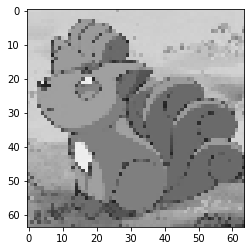

In [75]:
#Loading our test images 
height = 64
width = 64
dim = (width, height)
path = "D:\PokemonImages\PokemonData\Test"
pimagest=[]
for timg in (os.listdir(path)):
    try:
        testimg_read=cv2.imread(os.path.join(path,timg), cv2.IMREAD_GRAYSCALE)
        resize_timg = cv2.resize(testimg_read,dim)
        col_timg=cv2.cvtColor(resize_timg, cv2.IMREAD_GRAYSCALE)
        plt.imshow(col_timg, cmap='gray')
        pimagest.append((col_timg))
    except Exception :
        pass
    

In [76]:
# converting the images so they are the same type and shape as the training set
pimaged=np.array(pimagest).reshape(-1,64,64, 4)
pimageds=tf.dtypes.cast(pimaged, tf.float32) 

In [77]:
print (pimageds.shape)

(37, 64, 64, 4)


In [78]:
#Loading the model and storing the output
model=tf.keras.models.load_model('pdmodel2')

In [79]:
preds=model.predict(pimageds)

In [80]:
result=((np.argmax(preds, axis=1)))
print (result)

[135  60 130  78 145  38 148 124   1  32  48  21  88  66 102 102  71 104
  97  66  78  52  78   2  53  92  78  68  93 116 139  74 136  82 133 104
  43]


In [81]:
predpoke=[]
for r in result:
    predpoke.append(pokemon_name[r])

print (predpoke)
   

['Vaporeon', 'Jynx', 'Staryu', 'Mankey', 'Weepinbell', 'Fearow', 'Zapdos', 'Slowbro', 'Aerodactyl', 'Ekans', 'Graveler', 'Dewgong', 'Nidoqueen', 'Kingler', 'Pikachu', 'Pikachu', 'Machamp', 'Poliwag', 'Parasect', 'Kingler', 'Mankey', 'Haunter', 'Mankey', 'Alakazam', 'Hitmonchan', 'Oddish', 'Mankey', 'Krabby', 'Omanyte', 'Rhyhorn', 'Victreebel', 'Magikarp', 'Venomoth', 'Mew', 'Tentacool', 'Poliwag', 'Gloom']


In [82]:
#Webscaper function to retrieve pokemon information
def pokedexinfo(value):
    import requests
    from bs4 import BeautifulSoup
    URL = 'https://www.pokemon.com/uk/pokedex/'+value
    page = requests.get(URL)
    soups = BeautifulSoup(page.content, 'html.parser')
    pinfo=soups.find('p',class_='version-y active').text
    pab=soups.find('div',class_='pokemon-ability-info color-bg color-lightblue match active').text
    wgt=[] #list for weight 
    hgt=[] #list for height
    pabi=pab.lstrip() #Encoded it to text and removed empty space
    ptxt=pinfo.lstrip() #Pokemon description
    hgt.append(pabi[0:15]) #Height
    wgt.append(pabi[15:30])#Weight

    #Pokedex Information
    print (str(ptxt))
    #print 'Information'
    for h in hgt:
        print ('Height:',h[7:10],'m')

    for w in wgt:
        print  ('Weight:', w[7:11],'kg')

Vaporeon


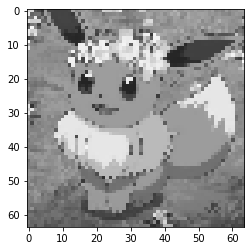

Vaporeon underwent a spontaneous mutation and grew fins
and gills that allow it to live underwater. This Pokémon has the
ability to freely control water.
                
Height: 1.0 m
Weight: 29.0 kg


In [95]:
#Testing our pokedex -close but not quite. may need to tweak the model
print (predpoke[0]) 
pr=pimagest[0]
pt=cv2.resize(pr,dim)
plt.imshow(pt,cmap='gray')
plt.show()
pokedexinfo(predpoke[0])

Venomoth


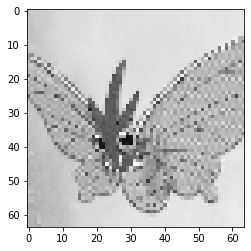

Venomoth is nocturnal—it is a Pokémon that only becomes
active at night. Its favorite prey are small insects that gather
around streetlights, attracted by the light in the darkness.
                
Height: 1.5 m
Weight: 12.5 kg


In [96]:
#Testing our pokedex 
print (predpoke[32]) 
pr=pimagest[32]
pt=cv2.resize(pr,dim)
plt.imshow(pt,cmap='gray')
plt.show()
pokedexinfo(predpoke[32])